In [1]:
import einops
from functools import partial

In [2]:
from Data.dataloaders import ABIDELoader

In [3]:
transforms = {'fmri': [partial(einops.rearrange, pattern='b h l d -> b 1 d h l')]}
datahandler = ABIDELoader(
    root_dir=r"/Users/balazsmorvay/Downloads/ABIDE/data/Outputs/ccs/filt_noglobal/func_preproc",
    exp_path=r"../Configurations/ABIDE",
    transforms=transforms,
    batch_size=1,
    num_workers=12,
    prefetch_factor=2,
    persistent_workers=True
)

In [5]:
datahandler.setup(stage='test')
batch = next(iter(datahandler.test_dataloader()))
batch['fmri']

/Users/balazsmorvay/PycharmProjects/VAE/Data/datasets.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_info['TIME_SLICE'] = 0
/Users/balazsmorvay/PycharmProjects/VAE/Data/datasets.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_info['TIME_SLICE'] = 0
/Users/balazsmorvay/anaconda3/envs/VAE/lib/python3.11/site-packages/torch/utils/data/_utils/collate.py:171: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable befor

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         ...,

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 

In [9]:
image = batch['fmri'].squeeze()
image.shape

torch.Size([61, 73, 61])

<Figure size 640x480 with 0 Axes>

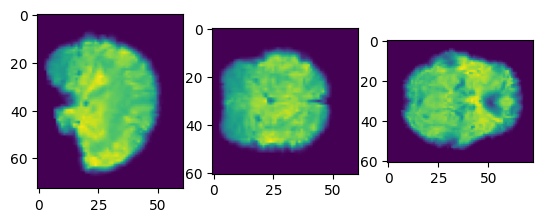

In [33]:
import matplotlib.pyplot as plt
from einops import rearrange

plt.figure()

f, axarr = plt.subplots(1,3) 
axarr[0].imshow(image[20, ...]) # w * d
axarr[1].imshow(rearrange(image, 'h w d -> w h d')[20]) # h * d
axarr[2].imshow(image[..., 20]) # h * w
